In [1]:
#Importamos las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import ast
import matplotlib.colors as colors

In [2]:
data = pd.read_csv("AccidentesAviones.csv")


In [3]:
# crear un diccionario con los nombres nuevos y antiguos
nombres_columnas = {'Unnamed: 0': 'No Identificado', 
                    'fecha': 'Fecha', 
                    'HORA declarada': 'Hora Declarada', 
                    'Ruta': 'Ruta', 
                    'OperadOR': 'Operador', 
                    'flight_no': 'Numero de Vuelo', 
                    'route': 'route',
                    'ac_type': 'Tipo de Aeronave',
                    'registration': 'Registro',
                    'cn_ln': 'CN/LN',
                    'all_aboard': 'Total A Bordo',
                    'PASAJEROS A BORDO': 'Pasajeros A Bordo',
                    'crew_aboard': 'Tripulación A Bordo',
                    'cantidad de fallecidos': 'Total de Fallecidos',
                    'passenger_fatalities': 'Pasajeros Fallecidos',
                    'crew_fatalities': 'Tripulación Fallecida',
                    'ground': 'Personas Fallecidas en Tierra',
                    'summary': 'Resumen del Incidente'}

# renombrar las columnas usando el diccionario
data = data.rename(columns=nombres_columnas)


In [4]:
data["Fecha"].max()

'September 30, 2017'

Agregamos datos actualizados

In [5]:
#cargamos los nuevos datos 
datos_2022 = pd.read_csv("datos2022.csv")


In [6]:
datos_2023 = pd.read_csv("datos2023.csv")

In [7]:
#nos quedamos con los datos que vamos a usar
data_2023 = datos_2023.loc[:,["EventDate", "Country","FatalInjuryCount", "ProbableCause","MinorInjuryCount" ]]

In [8]:
data_2022 = datos_2022.loc[:,["EventDate", "Country","FatalInjuryCount", "ProbableCause", "MinorInjuryCount" ]]

In [9]:
datos = data.loc[:,["Fecha", "Ruta", "Tipo de Aeronave", "Total de Fallecidos", "Resumen del Incidente","Personas Fallecidas en Tierra", "Total A Bordo"]]

In [10]:
data_22_23 = pd.concat([data_2022, data_2023]) 

In [16]:
data1 = pd.concat([data_22_23, data], join="outer", sort= False)

In [ ]:
data1["Fecha"].max()

In [11]:
#cambiamos a español
nueva_columna= {"EventDate": "Fecha",
              "FatalInjuryCount": "Total de Fallecidos",
            "ProbableCause": "Posibles Causas",
            "Country":"Pais del accidente",
            "MinorInjuryCount": "Numero de personas con lesiones menores"
}
data_22_23= data_22_23.rename(columns=nueva_columna)

Cambiamos a formato Fecha

In [14]:
data["Fecha"] = pd.to_datetime(data["Fecha"])

In [15]:
data["Fecha"] = pd.to_datetime(data["Fecha"], format= "%Y- %m-%d").dt.strftime("%Y-%m-%d")

In [17]:
data1['Fecha'] = pd.to_datetime(data1['Fecha'])

data1['Fecha'] = data1['Fecha'].dt.strftime('%Y-%m-%d')

In [12]:
data_22_23["Fecha"] = pd.to_datetime(data_22_23["Fecha"])

In [13]:
data_22_23["Fecha"] = pd.to_datetime(data_22_23["Fecha"], format= "%Y- %m-%d").dt.strftime("%Y-%m-%d")

In [ ]:
#eliminamos los datos que ya no usaremos
datos_2022.drop(data_2022, axis=1, inplace=True)
datos_2023.drop(datos_2023, axis=1, inplace=True)
datos.drop(datos, axis=1, inplace=True)

In [18]:
data2 = data1.copy()

In [19]:
#vamos a borrar los datos apartir en 1980, vamos a trabajar con datos mas actualizado

data1['Fecha'] = pd.to_datetime(data1['Fecha'], format='%Y-%m-%d')
limite = pd.to_datetime('1980-01-01')

mascara = data1['Fecha'] >= limite
resultados = data1[mascara]

data1 = resultados.copy()

In [20]:
data1["Fecha"].max()

Timestamp('2023-05-18 00:00:00')

Revisamos la data para evaluar valores nulos, faltaste y valores que se tenga que modifica 

In [21]:
# replazamos los valores "?" 
data1["Ruta"].replace("?", "Sin Datos", inplace=True)

In [22]:
# Cambiamos los tipos de datos 
data1["Tipo de Aeronave"].replace("?", "Sin Datos", inplace=True)
data1["Total de Fallecidos"].replace("?", 0, inplace=True)
data1["Resumen del Incidente"].replace("?", "Sin Datos", inplace=True)
data1["Personas Fallecidas en Tierra"].replace("?",0, inplace=True)
data1["Total A Bordo"].replace("?", 0, inplace=True)
data1["Numero de personas con lesiones menores"].replace("?", 0, inplace=True)


In [23]:
#Analizamos cuantos nulos tenemos 
data1.isnull().sum()

Fecha                                         0
Pais del accidente                         1944
Total de Fallecidos                         151
Posibles Causas                            3408
Numero de personas con lesiones menores    2095
No Identificado                            2137
Hora Declarada                             2137
Ruta                                       2137
Operador                                   2137
Numero de Vuelo                            2137
route                                      2137
Tipo de Aeronave                           2137
Registro                                   2137
CN/LN                                      2137
Total A Bordo                              2137
Pasajeros A Bordo                          2137
Tripulación A Bordo                        2137
Pasajeros Fallecidos                       2137
Tripulación Fallecida                      2137
Personas Fallecidas en Tierra              2137
Resumen del Incidente                   

In [24]:
#borramos columnas que no nos va a seguir para el analisis 
data1.drop(["No Identificado","Hora Declarada", "Operador", "Numero de Vuelo","route","Registro","CN/LN", "Pasajeros A Bordo","Tripulación A Bordo","Pasajeros Fallecidos","Tripulación Fallecida"], axis=1, inplace=True)

In [25]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4081 entries, 0 to 5007
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Fecha                                    4081 non-null   datetime64[ns]
 1   Pais del accidente                       2137 non-null   object        
 2   Total de Fallecidos                      3930 non-null   object        
 3   Posibles Causas                          673 non-null    object        
 4   Numero de personas con lesiones menores  1986 non-null   float64       
 5   Ruta                                     1944 non-null   object        
 6   Tipo de Aeronave                         1944 non-null   object        
 7   Total A Bordo                            1944 non-null   object        
 8   Personas Fallecidas en Tierra            1944 non-null   object        
 9   Resumen del Incidente                    

In [26]:
data1["Ruta"].fillna("Sin Datos", inplace=True)
data1["Tipo de Aeronave"].fillna("Sin Datos", inplace=True)
data1["Total de Fallecidos"].fillna(0, inplace=True)
data1["Total de Fallecidos"].fillna(0, inplace=True)
data1["Resumen del Incidente"].fillna("Sin Datos", inplace=True)
data1["Pais del accidente"].fillna("Sin Datos", inplace=True)
data1["Posibles Causas"].fillna("Sin Datos", inplace=True)
data1["Personas Fallecidas en Tierra"].fillna(0, inplace=True)
data1["Total A Bordo"].fillna(0, inplace=True)
data1["Numero de personas con lesiones menores"].fillna(0, inplace=True)


In [27]:
#Cambiamos de tipo de dato
data1["Total de Fallecidos"] = data1["Total de Fallecidos"].astype(int)
data1["Personas Fallecidas en Tierra"] = data1["Personas Fallecidas en Tierra"].astype(int)
data1["Total A Bordo"] = data1["Total A Bordo"].astype(int)
data1["Numero de personas con lesiones menores"] = data1["Numero de personas con lesiones menores"].astype(int)


Analizamos datos 

In [28]:
data2 = data1.copy()

In [29]:
data2.describe()

,Total de Fallecidos,Numero de personas con lesiones menores,Total A Bordo,Personas Fallecidas en Tierra
count,4081.000000,4081.000000,4081.000000,4081.000000
mean,12.703504,0.121049,18.782406,1.747611
std,33.003555,0.571419,45.232365,61.080163
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000
75%,10.000000,0.000000,15.000000,0.000000
max,520.000000,19.000000,524.000000,2750.000000


Vamos hacer un grafico de dispersion para ver como se relacionan las variables 

In [30]:
df = data2[["Personas Fallecidas en Tierra","Total A Bordo","Numero de personas con lesiones menores", "Total de Fallecidos"]]

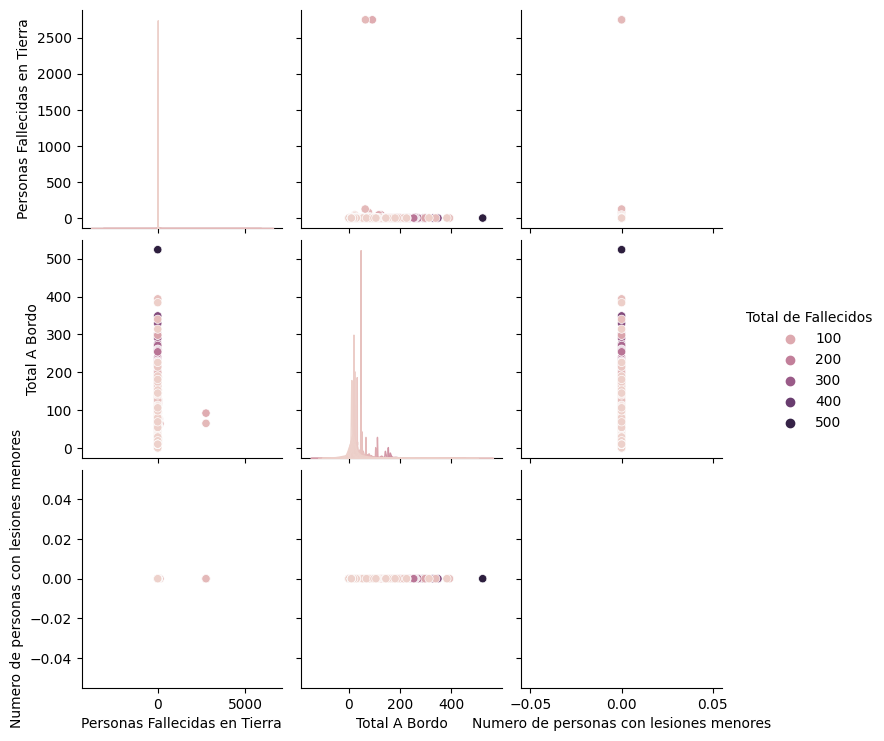

In [37]:
#Solo elegimos una pequeña cantidad de datos
top_10 = df.nlargest(1000, "Total de Fallecidos")
sns.pairplot(top_10, hue= "Total de Fallecidos")



In [38]:
df = data2[["Tipo de Aeronave", "Total de Fallecidos"]]

In [39]:
df = df[df["Tipo de Aeronave"] != "Sin Datos"]

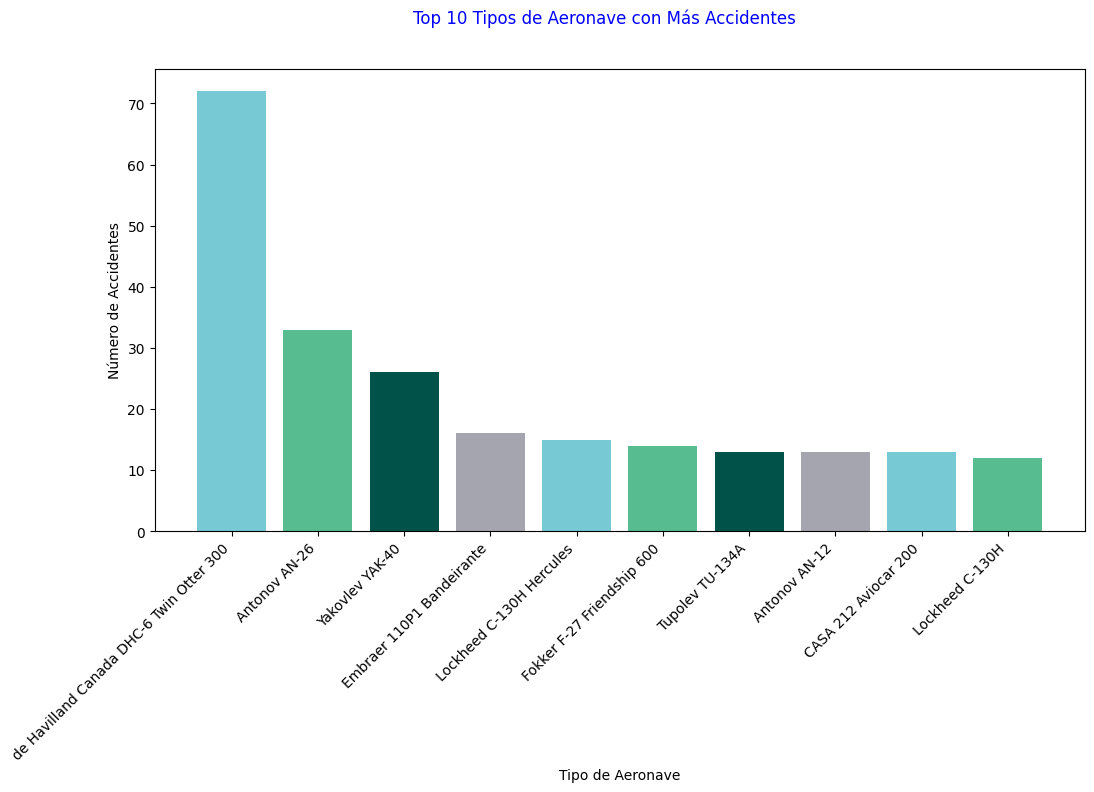

In [40]:
# agrupamos los accidentes por tipo de aeronave y contar el número de accidentes para cada grupo
count_by_aircraft_type = df.groupby("Tipo de Aeronave").size().sort_values(ascending=False)

# Crearmos el gráfico de barra
top_10 = count_by_aircraft_type[:10]
plt.figure(figsize=(12,6))

bar_plot = plt.bar(top_10.index, top_10.values, color ="Blue")
plt.xticks(rotation= 45, ha= "right")

# Etiquetar el eje x y agregar un título
plt.xlabel("Tipo de Aeronave")
plt.ylabel("Número de Accidentes")
title = plt.suptitle("Top 10 Tipos de Aeronave con Más Accidentes")
title.set_color("blue")
# Mostrar el gráfico
plt.show()


Creamos una mapa de correlacion

In [41]:
df1 = data2[["Personas Fallecidas en Tierra","Total A Bordo","Numero de personas con lesiones menores", "Total de Fallecidos"]]

In [42]:
matriz_correlacion = df1.corr()

C:\Users\luisr\AppData\Local\Temp\ipykernel_12180\675199873.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(nombres_columnas)
C:\Users\luisr\AppData\Local\Temp\ipykernel_12180\675199873.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(nombres_columnas)


(array([-1.,  0.,  1.,  2.,  3.,  4.]),
 [Text(-1.0, 1, ''),
  Text(0.0, 1, 'Personas Fallecidas en Tierra'),
  Text(1.0, 1, 'Total A Bordo'),
  Text(2.0, 1, 'Numero de personas con lesiones menores'),
  Text(3.0, 1, 'Total de Fallecidos'),
  Text(4.0, 1, '')])

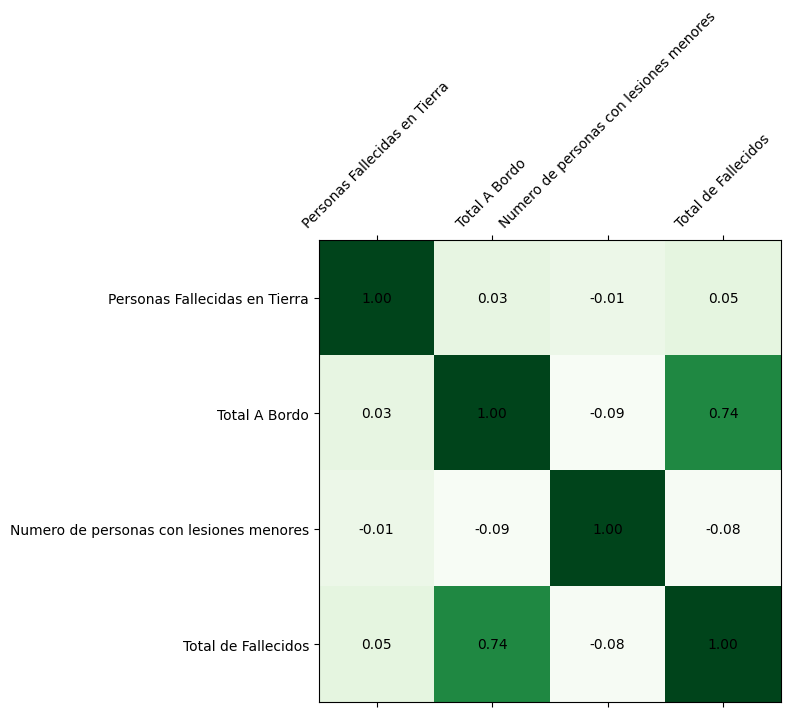

In [43]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.matshow(matriz_correlacion, cmap=plt.cm.Greens)

for i in range(matriz_correlacion.shape[0]):
    for j in range(matriz_correlacion.shape[1]):
        ax.text(i, j, f"{matriz_correlacion.iloc[i,j]:.2f}", ha="center", va="center")

nombres_columnas = [''] + list(matriz_correlacion.columns)
ax.set_xticklabels(nombres_columnas)
ax.set_yticklabels(nombres_columnas)
plt.xticks(rotation = 45)


In [45]:
data1.to_csv("data1_accidentes_aereos.csv", index=False)